# Calculate Quality Factor of the system and extract resonance frequeny values for observations that cannot be seen on the embeded system and determine the system sensitivity per volume antigen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Quality Factor

## Without chip

In [2]:
#Get the resonance frequency
data = pd.read_csv("18-04-2024_coil_with_no_chip_1.csv.crdownload")
min_amplitude_index = data[' Amplitude [dB]'].idxmin()
min_amplitude_row = data.loc[min_amplitude_index]
resonance_frequency = min_amplitude_row.iloc[0]
print(f"the resonance is {resonance_frequency} Hz")
#Find the 3dB bandwidth to get the range where the system is efficient
data[' Amplitude [dB]'] = data[' Amplitude [dB]'].astype(int)
get_3dB = data[' Amplitude [dB]'].min() + 3
found_3dB = data[data[' Amplitude [dB]'] == get_3dB]
if found_3dB.all:
     print(f"frequencies at the 3dB threshold {found_3dB} the system is efficient in between these threshold")
min_3dB_index = found_3dB["Frequency [Hz]"].idxmin()
max_3dB_index = found_3dB["Frequency [Hz]"].idxmax()
min_3dB_frequency = data.loc[min_3dB_index].iloc[0]
max_3dB_frequency = data.loc[max_3dB_index].iloc[0]
bandwidth_3dB = max_3dB_frequency - min_3dB_frequency
print(f"Frequency bandwidth between the lower and upper 3dB threshold is {bandwidth_3dB}")
Q_factor = resonance_frequency/bandwidth_3dB
print(f"Finally, the Quality factor = {Q_factor}")
print("the quality factor for this system in the environment is 1.5, this is a low number and does not really describe a stable sysem, but can be compared with other meduims like liquid, equally the value of the inductance and capacitance can be odified to increase the quality factor")

the resonance is 32064.47226017882 Hz
frequencies at the 3dB threshold      Frequency [Hz]   Amplitude [dB]   Phase [deg]
148    23851.189348              -32             0
149    24749.948363              -32             0
163    41540.708135              -32             0 the system is efficient in between these threshold
Frequency bandwidth between the lower and upper 3dB threshold is 17689.51878728275
Finally, the Quality factor = 1.8126254674169222
the quality factor for this system in the environment is 1.5, this is a low number and does not really describe a stable sysem, but can be compared with other meduims like liquid, equally the value of the inductance and capacitance can be odified to increase the quality factor


## With chip

In [3]:
#Get the resonance frequency
data1 = pd.read_csv("18-04-2024_coil_with_one_chip_1.csv.crdownload")
min_amplitude_index = data1[' Amplitude [dB]'].idxmin()
min_amplitude_row = data1.loc[min_amplitude_index]
resonance_frequency = min_amplitude_row.iloc[0]
print(f"the resonance is {resonance_frequency} Hz")
#Find the 3dB bandwidth to get the range where the system is efficient
data1[' Amplitude [dB]'] = data1[' Amplitude [dB]'].astype(int)
get_3dB = data1[' Amplitude [dB]'].min() + 3
found_3dB = data1[data1[' Amplitude [dB]'] == get_3dB]
if found_3dB.all:
     print(f"frequencies at the 3dB threshold {found_3dB} the system is efficient in between these threshold")
min_3dB_index = found_3dB["Frequency [Hz]"].idxmin()
max_3dB_index = found_3dB["Frequency [Hz]"].idxmax()
min_3dB_frequency = data1.loc[min_3dB_index].iloc[0]
max_3dB_frequency = data1.loc[max_3dB_index].iloc[0]
bandwidth_3dB = max_3dB_frequency - min_3dB_frequency
print(f"Frequency bandwidth between the lower and upper 3dB threshold is {bandwidth_3dB}")
Q_factor = resonance_frequency/bandwidth_3dB
print(f"Finally, the Quality factor = {Q_factor}")
print("the quality factor for this system in the environment is 1.5, this is a low number and does not really describe a stable sysem, but can be compared with other meduims like liquid, equally the value of the inductance and capacitance can be odified to increase the quality factor")


the resonance is 29778.00389102912 Hz
frequencies at the 3dB threshold      Frequency [Hz]   Amplitude [dB]   Phase [deg]
148    23851.189348              -33             0
160    37177.580657              -33             0 the system is efficient in between these threshold
Frequency bandwidth between the lower and upper 3dB threshold is 13326.391308804723
Finally, the Quality factor = 2.2345136954934564
the quality factor for this system in the environment is 1.5, this is a low number and does not really describe a stable sysem, but can be compared with other meduims like liquid, equally the value of the inductance and capacitance can be odified to increase the quality factor


### Below we perform multiple runs of the system with and without chips. each run is performed multiple times to evaluate the sytem stability. optaining the same frequency value each time shows that the system is stable over time

# First five runs of coil without chip 

In [4]:
minimum_values = []
file_names = ["18-04-2024_coil_with_no_chip_1.csv.crdownload", "18-04-2024_coil_with_no_chip_2.csv.crdownload", "18-04-2024_coil_with_no_chip_3.csv.crdownload", "18-04-2024_coil_with_no_chip_4.csv.crdownload", "18-04-2024_coil_with_no_chip_5.csv.crdownload"]
for file_name in file_names:
    data = pd.read_csv(file_name)
    min_amplitude_index = data[' Amplitude [dB]'].idxmin()
    min_amplitude_row = data.loc[min_amplitude_index]
    minimum_values.append(min_amplitude_row)

minimum_values
    

[Frequency [Hz]     32064.472260
  Amplitude [dB]      -35.606251
  Phase [deg]           0.000000
 Name: 156, dtype: float64,
 Frequency [Hz]     32064.472260
  Amplitude [dB]      -35.629623
  Phase [deg]           0.000000
 Name: 156, dtype: float64,
 Frequency [Hz]     32064.472260
  Amplitude [dB]      -35.609093
  Phase [deg]           0.000000
 Name: 156, dtype: float64,
 Frequency [Hz]     32064.472260
  Amplitude [dB]      -35.678783
  Phase [deg]           0.000000
 Name: 156, dtype: float64,
 Frequency [Hz]     32064.472260
  Amplitude [dB]      -35.683887
  Phase [deg]           0.000000
 Name: 156, dtype: float64]

# Second five runs of coil with one chip

In [5]:
minimum_values = []
file_names = ["18-04-2024_coil_with_one_chip_1.csv.crdownload", "18-04-2024_coil_with_one_chip_2.csv.crdownload", "18-04-2024_coil_with_one_chip_3.csv.crdownload", "18-04-2024_coil_with_one_chip_4.csv.crdownload", "18-04-2024_coil_with_one_chip_5.csv.crdownload"]
for file_name in file_names:
    data = pd.read_csv(file_name)
    min_amplitude_index = data[' Amplitude [dB]'].idxmin()
    min_amplitude_row = data.loc[min_amplitude_index]
    minimum_values.append(min_amplitude_row)

minimum_values

[Frequency [Hz]     29778.003891
  Amplitude [dB]      -36.513496
  Phase [deg]           0.000000
 Name: 154, dtype: float64,
 Frequency [Hz]     29778.003891
  Amplitude [dB]      -36.605049
  Phase [deg]           0.000000
 Name: 154, dtype: float64,
 Frequency [Hz]     29778.003891
  Amplitude [dB]      -36.568336
  Phase [deg]           0.000000
 Name: 154, dtype: float64,
 Frequency [Hz]     29778.003891
  Amplitude [dB]      -36.567471
  Phase [deg]           0.000000
 Name: 154, dtype: float64,
 Frequency [Hz]     29778.003891
  Amplitude [dB]      -36.608242
  Phase [deg]           0.000000
 Name: 154, dtype: float64]

# Third five runs of coil with two chips

In [6]:
minimum_values = []
file_names = ["18-04-2024_coil_with_two_chip_1.csv.crdownload", "18-04-2024_coil_with_two_chip_2.csv.crdownload", "18-04-2024_coil_with_two_chip_3.csv.crdownload", "18-04-2024_coil_with_two_chip_4.csv.crdownload", "18-04-2024_coil_with_two_chip_5.csv.crdownload"]
for file_name in file_names:
    data = pd.read_csv(file_name)
    min_amplitude_index = data[' Amplitude [dB]'].idxmin()
    min_amplitude_row = data.loc[min_amplitude_index]
    minimum_values.append(min_amplitude_row)

minimum_values

[Frequency [Hz]     27654.580077
  Amplitude [dB]      -36.226460
  Phase [deg]           0.000000
 Name: 152, dtype: float64,
 Frequency [Hz]     27654.580077
  Amplitude [dB]      -36.279305
  Phase [deg]           0.000000
 Name: 152, dtype: float64,
 Frequency [Hz]     27654.580077
  Amplitude [dB]      -36.268562
  Phase [deg]           0.000000
 Name: 152, dtype: float64,
 Frequency [Hz]     28696.658222
  Amplitude [dB]      -36.249897
  Phase [deg]           0.000000
 Name: 153, dtype: float64,
 Frequency [Hz]     27654.580077
  Amplitude [dB]      -36.295273
  Phase [deg]           0.000000
 Name: 152, dtype: float64]

# plot the graph with focus on the resonance to show the behaviour of the curve in all three runs

### The embeded system could plot the graph but the change of resonance frequency is too small to be observed as we show here

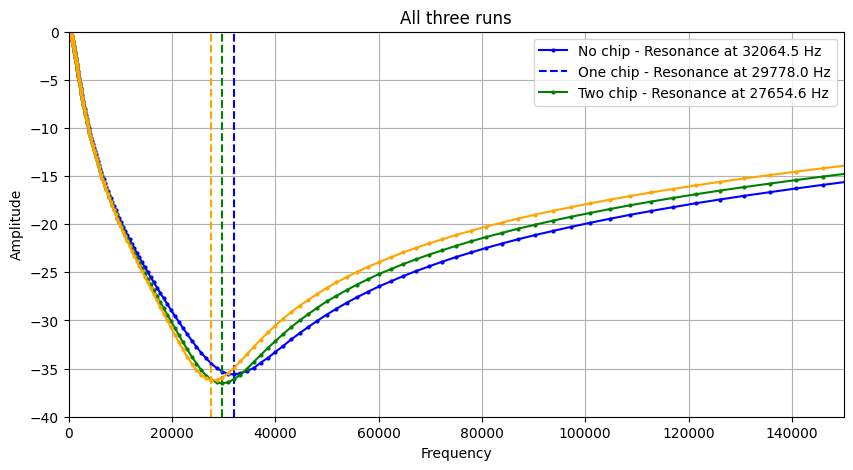

In [26]:
file_names = {"18-04-2024_coil_with_no_chip_1.csv.crdownload" : "No chip", "18-04-2024_coil_with_one_chip_1.csv.crdownload" : "One chip", "18-04-2024_coil_with_two_chip_1.csv.crdownload" : "Two chip"}
plt.figure(figsize=(10, 5))
colors = ['blue', 'green', 'orange']
legend_labels = []
for i, file_name in enumerate(file_names):
    data = pd.read_csv(file_name)
    color = colors[i]
    plt.plot(data['Frequency [Hz]'], data[' Amplitude [dB]'], marker='o', markersize = 2, label = file_names[file_name], color = color)
    min_idx = data[' Amplitude [dB]'].idxmin()
    min_freq = data['Frequency [Hz]'][min_idx]
    plt.axvline(x=min_freq, color= color, linestyle='--')
    legend_labels.append(f'{file_names[file_name]} - Resonance at {min_freq:.6} Hz')

# Adding title and labels
plt.title('All three runs')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

# Set x and y limits to zoom in
plt.xlim(0, 0.15e6)  # Adjust these values to zoom in on the x-axis
plt.ylim(-40, 0)    # Adjust these values to zoom in on the y-axis

# Show grid
plt.grid(True)
plt.legend(legend_labels)

# Display the plot
plt.show()

# Calculate the sensitivity of the system

### One chip has the mass of ~10g, and induced a change of frequency of ~2KHz as we've seen in the previous cases. the first chip induced ~ 2KHz and the second induced same equally. from this we can determine what volume of antigen that would induce what change of frequency!

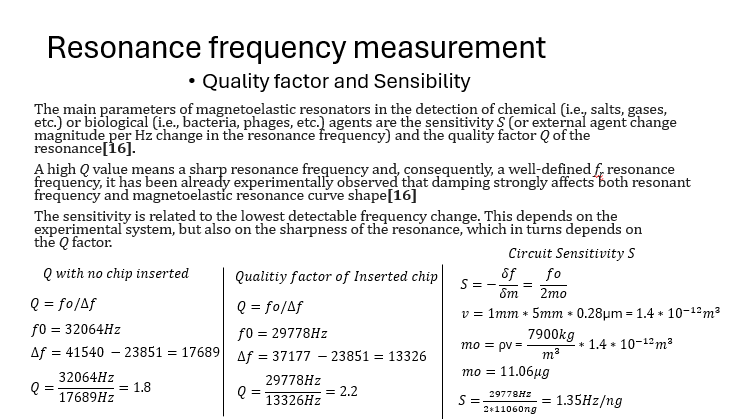

### At in the first run, there was no mass in the system, later in the second run the chip was added with a mass of ~11.06ug which induced a change of frequency of ~2KHz

In [46]:
change_of_mass = 11.06
change_of_frequency = 2000
data_file = pd.read_csv("18-04-2024_coil_with_one_chip_1.csv.crdownload")
min_idx = data_file[' Amplitude [dB]'].idxmin() #get the minimum amplitude in the dataframe
min_freq = data['Frequency [Hz]'][min_idx] #correlates the minimum amplitude to get the minimum frequency
sensitivity = min_freq/(2*change_of_mass)
print(f"{sensitivity:.1f} Hz/ug")
print(f"{sensitivity*10**(-3):.1f} Hz/ng")

1346.2 Hz/ug
1.3 Hz/ng


### From the above value, each change of mass of  1ng detected will induced a change of frequency of 1.3Hz